In [9]:
import pylab as plt
from glob import glob
from utils.utils import parse_filename, merge_patches, process_image_files
import numpy as np
import os

In [4]:
import pip
pip.main(['install', 'tensorboard'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting tensorboard

Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)

Collecting absl-py>=0.4 (from tensorboard)

Downloading absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)

Collecting grpcio>=1.48.2 (from tensorboard)

Downloading grpcio-1.72.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)

Collecting markdown>=2.6.8 (from tensorboard)

Downloading markdown-3.8-py3-none-any.whl.metadata (5.1 kB)

Requirement already satisfied: numpy>=1.12.0 in c:\tomograph4\lib\site-packages (from tensorboard) (2.0.2)

Requirement already satisfied: packaging in c:\users\geous\appdata\roaming\python\python312\site-packages (from tensorboard) (24.2)

Requirement already satisfied: protobuf!=4.24.0,>=3.19.6 in c:\tomograph4\lib\site-packages (from tensorboard) (5.29.3)

Requirement already satisfied: setuptools>=41.0.0 in c:\tomograph4\lib\site-packages (from tensorboard) (75.8.0)

Requirement already satisfied: six>1.9 in c:\users\geous\appdata\roaming\python\python312\site-packages (from tensorboard) (1.17.0)

Collecting tensorboard-data-server<0.8.0,>=0.7.0 (from tensorboard)

Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)

Collecting werkzeug>=1.0.1 (from tensorboard)

Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)

Requirement already satisfied: MarkupSafe>=2.1.1 in c:\tomograph4\lib\site-packages (from werkzeug>=1.0.1->tensorboard) (3.0.2)

Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)

Downloading absl_py-2.3.0-py3-none-any.whl (135 kB)

Downloading grpcio-1.72.1-cp312-cp312-win_amd64.whl (4.2 MB)

Output()

Downloading markdown-3.8-py3-none-any.whl (106 kB)

Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)

Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)

Installing collected packages: werkzeug, tensorboard-data-server, markdown, grpcio, absl-py, tensorboard

  WARNING: The script markdown_py.exe is installed in 'c:\tomograph4\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  WARNING: The script tensorboard.exe is installed in 'c:\tomograph4\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Successfully installed absl-py-2.3.0 grpcio-1.72.1 markdown-3.8 tensorboard-2.19.0 tensorboard-data-server-0.7.2 werkzeug-3.1.3

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

0

In [8]:
temp_root = r'D:\Data\CAUSE_data\limestone\results\2_classes\limestone_patches\dinov2_vit_base_14\2048\train_dinov2\temp'

In [12]:
masks_files = sorted(glob(f'{temp_root}/kmeans//*.png'), key=lambda p: parse_filename(p))
# if len(masks_files)>= args.patches_shape[0]*args.patches_shape[1]:
file_types = ['imgs', 'kmeans', 'crfs']
patches = {t: [] for t in file_types}

for file_type in file_types:
    files = sorted(glob(f'{temp_root}/{file_type}//*.png'), 
                        key=lambda p: parse_filename(p))
    for j in range(len(masks_files)):
        img = process_image_files(files[j], 320)
        patches[file_type].append(img)
        # os.remove(files[j])

In [59]:
patch_array = patches['crfs']
step = int(320 * 0.8)

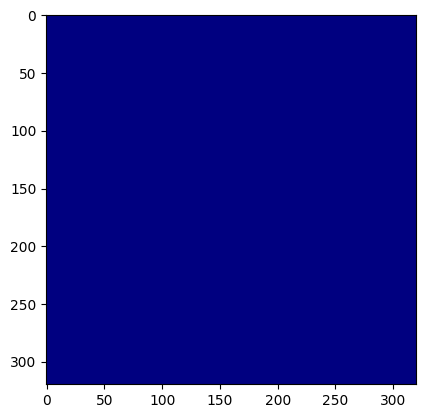

In [60]:
plt.imshow(patch_array[8])

In [61]:
full_mask = np.zeros((320, 2368, 2), dtype=np.uint8)

In [64]:
classes = np.arange(2)

In [ ]:
for i in range(len(patch_array[:9])):
    y0, x0 = 0 * step, i * step
    patch = patch_array[i]
    for idx, cls in enumerate(2):
        mask = (patch == cls)
        if mask.any():
            full_mask[y0:y0+320, x0:x0+320, idx] += mask.astype(np.uint8)
    mask = classes[full_mask.argmax(axis=-1)].astype(patches.dtype)

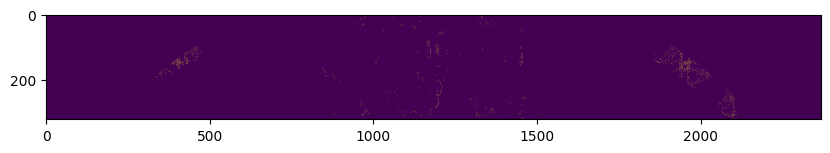

In [91]:
plt.figure(figsize=(10, 8))
plt.imshow((merged*(255//(classes.shape[0]-1))))

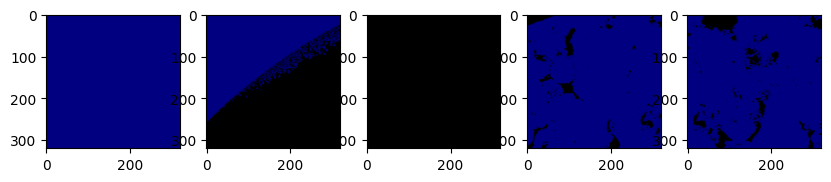

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
for i in range(len(patch_array[:5])):
    ax[i].imshow(patch_array[i])

In [ ]:
cv2.imwrite('CAUSE')

In [86]:
merged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

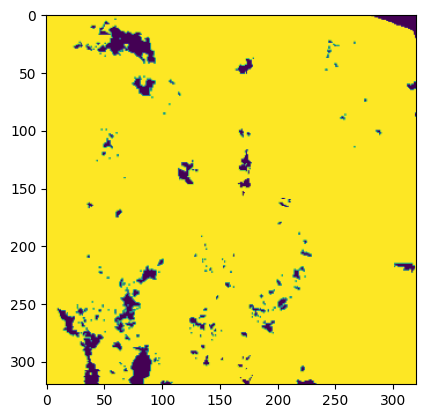

In [80]:
plt.imshow(cv2.cvtColor(patch_array[5], cv2.COLOR_RGB2GRAY))